# import Libraries

In [3]:
import pandas as pd
import json
import requests
import glob
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [9]:
csv_files = glob.glob("./data/*.csv")
flat_data = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)


In [10]:
# finding shape in dataset rows and coulmns 
flat_data.shape

(917531, 11)

In [11]:
flat_data.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [12]:
# checking information
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917531 entries, 0 to 917530
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                917531 non-null  object 
 1   town                 917531 non-null  object 
 2   flat_type            917531 non-null  object 
 3   block                917531 non-null  object 
 4   street_name          917531 non-null  object 
 5   storey_range         917531 non-null  object 
 6   floor_area_sqm       917531 non-null  float64
 7   flat_model           917531 non-null  object 
 8   lease_commence_date  917531 non-null  int64  
 9   resale_price         917531 non-null  float64
 10  remaining_lease      208481 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.0+ MB


In [13]:
flat_data.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [14]:
# Handling Drop Null Values..
flat_data = flat_data.dropna()

In [15]:
flat_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [16]:
flat_data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,208481.000000,208481.000000,2.084810e+05
mean,97.222261,1995.008025,4.823848e+05
std,24.054336,13.595554,1.661293e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.600000e+05
50%,94.000000,1995.000000,4.500000e+05
75%,112.000000,2004.000000,5.700000e+05
max,280.000000,2022.000000,1.568888e+06


In [17]:
# Checking the 
flat_data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [19]:
list_of_mrt = ['Jurong East MRT Station','Bukit Batok MRT Station','Bukit Gombak MRT Station','Choa Chu Kang MRT Station','Yew Tee MRT Station','Kranji MRT Station','Marsiling MRT Station','Woodlands MRT Station','Admiralty MRT Station',
    'Sembawang MRT Station','Canberra MRT Station','Yishun MRT Station','Khatib MRT Station','Yio Chu Kang MRT Station','Ang Mo Kio MRT Station','Bishan MRT Station','Braddell MRT Station','Toa Payoh MRT Station',
    'Novena MRT Station','Newton MRT Station','Orchard MRT Station','Somerset MRT Station','Dhoby Ghaut MRT Station','City Hall MRT Station','Raffles Place MRT Station','Marina Bay MRT Station','Marina South Pier MRT Station',
    'Pasir Ris MRT Station','Tampines MRT Station','Simei MRT Station','Tanah Merah MRT Station','Bedok MRT Station','Kembangan MRT Station','Eunos MRT Station','Paya Lebar MRT Station','Aljunied MRT Station','Kallang MRT Station',
    'Lavender MRT Station','Bugis MRT Station','Tanjong Pagar MRT Station','Outram Park MRT Station','Tiong Bahru MRT Station','Redhill MRT Station','Queenstown MRT Station','Commonwealth MRT Station','Buona Vista MRT Station','Dover MRT Station','Clementi MRT Station',
    'Chinese Garden MRT Station','Lakeside MRT Station','Boon Lay MRT Station','Pioneer MRT Station','Joo Koon MRT Station','Gul Circle MRT Station','Tuas Crescent MRT Station','Tuas West Road MRT Station','Tuas Link MRT Station','Expo MRT Station',
    'Changi Airport MRT Station','HarbourFront MRT Station','Chinatown MRT Station','Clarke Quay MRT Station','Little India MRT Station','Farrer Park MRT Station','Boon Keng MRT Station','Potong Pasir MRT Station','Woodleigh MRT Station','Serangoon MRT Station',
    'Kovan MRT Station','Hougang MRT Station','Buangkok MRT Station','Sengkang MRT Station','Punggol MRT Station','Bras Basah MRT Station','Esplanade MRT Station','Promenade MRT Station','Nicoll Highway MRT Station','Stadium MRT Station','Mountbatten MRT Station',
    'Dakota MRT Station','MacPherson MRT Station','Tai Seng MRT Station','Bartley MRT Station','Lorong Chuan MRT Station','Marymount MRT Station','Caldecott MRT Station','Botanic Gardens MRT Station','Farrer Road MRT Station','Holland Village MRT Station','one-north MRT Station',
    'Kent Ridge MRT Station','Haw Par Villa MRT Station','Pasir Panjang MRT Station','Labrador Park MRT Station','Telok Blangah MRT Station','Bayfront MRT Station','Bukit Panjang MRT Station',
    'Cashew MRT Station','Hillview MRT Station','Beauty World MRT Station','King Albert Park MRT Station','Sixth Avenue MRT Station','Tan Kah Kee MRT Station','Stevens MRT Station','Rochor MRT Station','Downtown MRT Station',
    'Telok Ayer MRT Station','Fort Canning MRT Station','Bencoolen MRT Station','Jalan Besar MRT Station','Bendemeer MRT Station','Geylang Bahru MRT Station','Mattar MRT Station','Ubi MRT Station','Kaki Bukit MRT Station',
    'Bedok North MRT Station','Bedok Reservoir MRT Station','Tampines West MRT Station','Tampines East MRT Station','Upper Changi MRT Station','Woodlands North MRT Station','Woodlands South MRT Station'
]

In [20]:
len(list_of_mrt)

122

In [21]:
mrt_lat = [ 1.33329506563598,1.3487108105756, 1.35861159094192,1.38536316540225,1.39757979021386, 1.42508698073648,1.43252114855026, 1.43605761708128, 1.44058856161847, 1.44905082158502, 1.44307664075699, 
            1.42944308477331, 1.41738337009565, 1.38168259989517, 1.36993284962264, 1.35131580146658, 1.3404690010277, 1.33259672794159, 1.32044079120154, 1.3123189224097, 1.30242224836722, 1.30026416739006, 
            1.29868872290409, 1.29298990728295, 1.28393326207164, 1.27642735476716, 1.27102703612006, 1.37304331635804, 1.34551530560119, 1.34319707851829, 1.32718729074675, 1.32040148729112, 1.3210381335934, 
            1.31978354916088, 1.31719911972353, 1.3164326118157, 1.31148890998818, 1.30737781747063, 1.30046508509717, 1.27656131737246, 1.27973970679335, 1.28610253588403, 1.28963453412887,1.29455085184931, 
            1.30250199924325, 1.3072237082044, 1.31140529320963, 1.31511625277378, 1.34235282081401, 1.34425911493819, 1.33861033900695, 1.33758701106708, 1.3277170408447, 1.31947090075208, 1.32102695598684, 1.32998504653102, 
            1.34088242451105, 1.33538252614956, 1.35747897447692, 1.26538938374901, 1.28422391919085, 1.28838602407588, 1.30724381608438, 1.31190557325774, 1.31959679168634, 1.3318797140041, 1.33919004519388, 
            1.35063361526525, 1.36017917065237, 1.37129226620797, 1.38287001971672, 1.39169462601522, 1.41492733388605, 1.2967526221395, 1.2936577245386, 1.29399798636232, 1.29976684675139, 
            1.3028124684707, 1.30620190525331, 1.30854798388121, 1.32615024457361, 1.33514564170352, 1.34250117805245, 1.35153128621585, 1.348707263451, 1.33724561271722, 1.32211373558877, 
            1.31743915158967, 1.31226422601049, 1.29973599364922,1.29353698622126,1.28260725045254,1.27621352233766, 1.27225417749656, 1.27070647717762, 1.28187378879209, 1.37900211641036,1.36981544925552,
            1.36234486803558,1.34122317558549, 1.335893496278, 1.33096058134451, 1.32639224146351, 1.32006555750626,1.30385218527656, 1.27944638178916, 1.28206894769394, 1.29248194822996, 1.29891843369422, 
            1.3051713878069, 1.31367252847691, 1.32130110228321, 1.32687671501334, 1.32997425973974, 1.33496735995428, 1.33474211664091, 1.33660782955099, 1.3456336579777, 1.35619148271544,
            1.34173977444995,1.44778217342648, 1.42748811362716]

In [22]:
len(mrt_lat)

122

In [23]:
mrt_long = [103.742153884191,103.749334517338,103.751790910733,103.744370779756,103.747459490883,103.762137459497,103.774074641403,103.787938777173,103.800990519771,103.820046140211,103.829702590959,
            103.835005047246,103.832979908243,103.844991053696,103.849558091776,103.84914026532,103.846799083148,103.847577286075,103.843825618748,103.837984594021,103.823868523249,103.839085753124,
            103.846179896647,103.852542630611,103.851463066756,103.854597776754,103.862447515736,103.949284527763,103.938436971222,103.953377214378,103.946348600798,103.957183823478,103.912947930851,103.903225807255,
            103.8923648823,103.882906044385,103.871386541754,103.862767633888,103.855706730933,103.845725186759,103.839513521005,103.827445112691,103.81674097205,103.806077155982,103.798228523336,
            103.790253514502,103.778637841909,103.765191452888,103.732596738363,103.720949087456,103.706084900902,103.697321608474,103.678374996165,103.660530461345,103.649078235627,103.639616648771,
            103.636991425128,103.962374747451,103.98788356959,103.821530157095,103.845143798953,103.846555209694,103.849841614124,103.853477716509,103.861750715496,103.869057877586,103.87081830915,
            103.872771660431,103.885064856353,103.892380513029,103.893122569706,103.895484694279,103.910166388177,103.850918752694,103.855081226245,103.860350000188,103.86363696572,103.875337711089,
            103.882528081052,103.889064718377,103.889298600376,103.888336109832,103.880177899184,103.864812169514,103.839423132332,103.840161782075,103.814984510627,103.807379214161,103.796470444998,
            103.787472120061,103.784572366867,103.781795517386,103.791350313288,103.802631578766,103.809761611219,103.859079764874,103.761535114929,103.76443921414,103.767418254007,103.775794285083,
            103.783235863233,103.796969279733,103.806548201692,103.826024401924,103.852769428884,103.852840829581,103.848648781083,103.844331362465,103.850353762717,103.855295713435,103.862977620945,
            103.871622627142,103.883247509542,103.899226655439,103.908459338046,103.91797832995,103.932234623286,103.938492495285,103.9546344625,103.961472788634,103.7851355073,103.792729941333]

In [24]:
len(mrt_long)

122

In [25]:
mrt_location = pd.DataFrame({'MRT': list_of_mrt,'latitude':mrt_lat,'longitude':mrt_long})

In [26]:
mrt_location.head()

,MRT,latitude,longitude
0,Jurong East MRT Station,1.333295,103.742154
1,Bukit Batok MRT Station,1.348711,103.749335
2,Bukit Gombak MRT Station,1.358612,103.751791
3,Choa Chu Kang MRT Station,1.385363,103.744371
4,Yew Tee MRT Station,1.397580,103.747459


In [27]:
mrt_location.shape

(122, 3)

In [28]:
mrt_location.to_csv('Singapore_MRT.csv',index=False)

In [29]:
flat_data.loc[:,'address'] = flat_data['block'] + " " + flat_data['street_name']

In [30]:
flat_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address
656847,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,174 ANG MO KIO AVE 4
656848,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,541 ANG MO KIO AVE 10
656849,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,163 ANG MO KIO AVE 4
656850,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,446 ANG MO KIO AVE 10
656851,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...
865323,2024-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,783000.0,63 years 11 months,325 YISHUN CTRL
865324,2024-01,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 08 months,356 YISHUN RING RD
865325,2024-01,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,888000.0,63 years 07 months,360 YISHUN RING RD
865326,2024-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,795000.0,63 years 05 months,387 YISHUN RING RD


In [31]:
address_list = flat_data['address'].unique()

In [32]:
address_list

array(['174 ANG MO KIO AVE 4', '541 ANG MO KIO AVE 10',
       '163 ANG MO KIO AVE 4', ..., '606A TAMPINES ST 61',
       '606D TAMPINES ST 61', '823 YISHUN ST 81'], dtype=object)

In [60]:
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []

for i in range(min(30, len(address_list))):  # Considering the first 10 addresses
    query_address = address_list[i]

    try:
        query_string = 'https://www.onemap.gov.sg/api/common/elastic/search?searchVal=' + str(
            query_address) + '&returnGeom=Y&getAddrDetails=Y'

        resp = requests.get(query_string)

        if resp.status_code == 200:  # Corrected the status code check
            data_geo_location = json.loads(resp.content)

            if data_geo_location['found'] != 0:
                # Updated the index to 0 for fetching the first result
                latitude.append(data_geo_location['results'][0]['LATITUDE'])
                longitude.append(data_geo_location['results'][0]['LONGITUDE'])
                blk_no.append(data_geo_location['results'][0]['BLK_NO'])
                road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
                postal_code.append(data_geo_location['results'][0]['POSTAL'])
                address.append(query_address)
                print(str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] +
                      " Long: " + data_geo_location['results'][0]['LONGITUDE'])
            else:
                print("No Results")
        else:
            print(f"Error accessing API for address: {query_address}. Status code: {resp.status_code}")

    except requests.ConnectionError:
        print(f"Connection error for address: {query_address}. Skipping.")

174 ANG MO KIO AVE 4 ,Lat: 1.37509746867904 Long: 103.83761896123
541 ANG MO KIO AVE 10 ,Lat: 1.37392239168826 Long: 103.855621371068
163 ANG MO KIO AVE 4 ,Lat: 1.37355178595963 Long: 103.838168959329
446 ANG MO KIO AVE 10 ,Lat: 1.36776094720351 Long: 103.85535715026
557 ANG MO KIO AVE 10 ,Lat: 1.3716257020332 Long: 103.857736107527
603 ANG MO KIO AVE 5 ,Lat: 1.38020079047279 Long: 103.83575571651
709 ANG MO KIO AVE 8 ,Lat: 1.37113720765377 Long: 103.847662320064
333 ANG MO KIO AVE 1 ,Lat: 1.3613425564061 Long: 103.851698621454
109 ANG MO KIO AVE 4 ,Lat: 1.3700965375834 Long: 103.837687766047
564 ANG MO KIO AVE 3 ,Lat: 1.36984837555524 Long: 103.859404131956
218 ANG MO KIO AVE 1 ,Lat: 1.36511907555698 Long: 103.841742483384
556 ANG MO KIO AVE 10 ,Lat: 1.37203236308683 Long: 103.857625375797
156 ANG MO KIO AVE 4 ,Lat: 1.37549519574964 Long: 103.839947470774
471 ANG MO KIO AVE 10 ,Lat: 1.36346600647245 Long: 103.856702918462
434 ANG MO KIO AVE 10 ,Lat: 1.3678915069194 Long: 103.853455026

In [ ]:
!pip install geopy

In [61]:
flat_coordinates = pd.DataFrame({'latitude':latitude,'longitude':longitude,'blk_no':blk_no,
                                 'road_name':road_name,'postal_code':postal_code,'address':address})


In [63]:
len(flat_coordinates)

30

In [64]:
list_of_latitude = flat_coordinates['latitude']
list_of_logitude = flat_coordinates['longitude']
mrt_lat = mrt_location['latitude']
mrt_long = mrt_location['longitude']

In [65]:
list_of_coordinates = []
list_of_mrt_coordinates = []
for lat, long in zip(list_of_latitude,list_of_logitude):
    list_of_coordinates.append((lat,long))
for lat, long in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat,long))

In [66]:
from geopy.distance import geodesic
list_of_dist_mrt = []
min_dist_mrt = []
for origin in list_of_coordinates:
    for destination in range(0,len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin,list_of_mrt_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mrt))
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [67]:
cbd_dist = []
for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin,(1.2830,103.8513)).meters)

In [68]:
flat_coordinates['cbd_dist'] = cbd_dist
flat_coordinates['min_dist_mrt'] = min_dist_mrt

In [69]:
flat_coordinates

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.37509746867904,103.83761896123,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897
1,1.37392239168826,103.855621371068,541,ANG MO KIO AVENUE 10,560541,541 ANG MO KIO AVE 10,10065.227934,806.176499
2,1.37355178595963,103.838168959329,163,ANG MO KIO AVENUE 4,560163,163 ANG MO KIO AVE 4,10118.831546,1176.742184
3,1.36776094720351,103.85535715026,446,ANG MO KIO AVENUE 10,560446,446 ANG MO KIO AVE 10,9383.300476,688.601573
4,1.3716257020332,103.857736107527,557,ANG MO KIO AVENUE 10,560557,557 ANG MO KIO AVE 10,9825.917255,929.164159
5,1.38020079047279,103.83575571651,603,ANG MO KIO AVENUE 5,560603,603 ANG MO KIO AVE 5,10886.292880,1040.755276
6,1.37113720765377,103.847662320064,709,ANG MO KIO AVENUE 8,560709,709 ANG MO KIO AVE 8,9754.165210,249.490989
7,1.3613425564061,103.851698621454,333,ANG MO KIO AVENUE 1,560333,333 ANG MO KIO AVE 1,8662.831360,979.286100
8,1.3700965375834,103.837687766047,109,ANG MO KIO AVENUE 4,560109,109 ANG MO KIO AVE 4,9749.107228,1321.147397
9,1.36984837555524,103.859404131956,564,ANG MO KIO AVENUE 3,560564,564 ANG MO KIO AVE 3,9645.507145,1095.784825


In [70]:
flat_coordinates.to_csv('flat_coordinates.csv',index=False)

In [71]:
flat_coordinates_1 = pd.read_csv('flat_coordinates.csv')

In [72]:
flat_coordinates_1

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1096.947897
1,1.373922,103.855621,541,ANG MO KIO AVENUE 10,560541,541 ANG MO KIO AVE 10,10065.227934,806.176499
2,1.373552,103.838169,163,ANG MO KIO AVENUE 4,560163,163 ANG MO KIO AVE 4,10118.831546,1176.742184
3,1.367761,103.855357,446,ANG MO KIO AVENUE 10,560446,446 ANG MO KIO AVE 10,9383.300476,688.601573
4,1.371626,103.857736,557,ANG MO KIO AVENUE 10,560557,557 ANG MO KIO AVE 10,9825.917255,929.164159
5,1.380201,103.835756,603,ANG MO KIO AVENUE 5,560603,603 ANG MO KIO AVE 5,10886.292880,1040.755276
6,1.371137,103.847662,709,ANG MO KIO AVENUE 8,560709,709 ANG MO KIO AVE 8,9754.165210,249.490989
7,1.361343,103.851699,333,ANG MO KIO AVENUE 1,560333,333 ANG MO KIO AVE 1,8662.831360,979.286100
8,1.370097,103.837688,109,ANG MO KIO AVENUE 4,560109,109 ANG MO KIO AVE 4,9749.107228,1321.147397
9,1.369848,103.859404,564,ANG MO KIO AVENUE 3,560564,564 ANG MO KIO AVE 3,9645.507145,1095.784825


In [73]:
flat_new = flat_coordinates_1.merge(flat_data,on="address",how = 'outer')

In [74]:
flat_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69
2,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68
3,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68
4,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208476,NaN,NaN,NaN,NaN,NaN,606A TAMPINES ST 61,NaN,NaN,2024-01,TAMPINES,3 ROOM,606A,TAMPINES ST 61,10 TO 12,68.0,Model A,2020,508000.0,95 years 02 months
208477,NaN,NaN,NaN,NaN,NaN,606A TAMPINES ST 61,NaN,NaN,2024-01,TAMPINES,4 ROOM,606A,TAMPINES ST 61,13 TO 15,92.0,Model A,2020,720000.0,95 years 02 months
208478,NaN,NaN,NaN,NaN,NaN,606A TAMPINES ST 61,NaN,NaN,2024-01,TAMPINES,4 ROOM,606A,TAMPINES ST 61,13 TO 15,92.0,Model A,2020,745000.0,95 years 01 month
208479,NaN,NaN,NaN,NaN,NaN,606D TAMPINES ST 61,NaN,NaN,2024-01,TAMPINES,4 ROOM,606D,TAMPINES ST 61,16 TO 18,92.0,Model A,2020,725000.0,95 years 01 month


In [75]:
flat_new['resale_price'] = flat_new['resale_price'].astype('float')
flat_new['floor_area_sqm'] = flat_new['floor_area_sqm'].astype('float')
flat_new['lease_commence_date'] = flat_new['lease_commence_date'].astype('int64')
flat_new['lease_remain_years'] = 99 - (2023 - flat_new['lease_commence_date'])
flat_new.dropna(inplace=True)

In [76]:
flat_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2022-08,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,395000.0,55 years 06 months,55
1025,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2022-09,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,07 TO 09,73.0,New Generation,1979,400000.0,55 years 05 months,55
1026,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2023-05,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,400000.0,54 years 09 months,55
1027,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2023-08,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,04 TO 06,73.0,New Generation,1979,439000.0,54 years 06 months,55


In [77]:
flat_new.to_csv('combined.csv',index=False)

In [78]:
flat_new_1 = pd.read_csv('combined.csv')

In [79]:
flat_new_1

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2022-08,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,395000.0,55 years 06 months,55
1025,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2022-09,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,07 TO 09,73.0,New Generation,1979,400000.0,55 years 05 months,55
1026,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2023-05,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,400000.0,54 years 09 months,55
1027,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2023-08,ANG MO KIO,3 ROOM,424,ANG MO KIO AVE 3,04 TO 06,73.0,New Generation,1979,439000.0,54 years 06 months,55


In [80]:
flat_new['lease_commence_date'].unique()

array([1986, 1981, 1980, 1979, 1978, 1985, 1976, 1977], dtype=int64)

In [81]:
flat_new['lease_commence_date'].min()

1976

In [82]:
flat_new['lease_commence_date'].max()

1986

In [83]:
flat_new['block'].unique()

array(['174', '541', '163', '446', '557', '603', '709', '333', '109',
       '564', '218', '556', '156', '471', '434', '560', '332', '421',
       '506', '631', '153', '442', '558', '212', '152', '331', '121',
       '130', '646', '424'], dtype=object)

In [56]:
flat_new['street_name'].unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3',
       'ANG MO KIO AVE 6', 'ANG MO KIO ST 52', 'ANG MO KIO ST 21',
       'ANG MO KIO ST 31', 'BEDOK RESERVOIR RD', 'BEDOK STH RD',
       'BEDOK NTH ST 3', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'NEW UPP CHANGI RD', 'CHAI CHEE ST', 'BEDOK NTH ST 1',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 2', 'CHAI CHEE AVE',
       'BEDOK NTH AVE 3', 'BEDOK STH AVE 1', 'BEDOK CTRL',
       'BEDOK NTH AVE 2', 'BEDOK STH AVE 2', 'BEDOK RESERVOIR VIEW',
       'CHAI CHEE RD', 'JLN TENAGA', 'BEDOK STH AVE 3', 'LENGKONG TIGA',
       'SHUNFU RD', 'BISHAN ST 24', 'BISHAN ST 12', 'BISHAN ST 22',
       'BISHAN ST 13', 'BISHAN ST 23', 'BRIGHT HILL DR', 'SIN MING AVE',
       'BT BATOK ST 52', 'BT BATOK WEST AVE 4', 'BT BATOK WEST AVE 2',
       'BT BATOK EAST AVE 4', 'BT BATOK EAST AVE 3', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 8', 'BT BATOK ST 

In [84]:
flat_new['blk_no'].unique()

array([174., 541., 163., 446., 557., 603., 709., 333., 109., 564., 218.,
       556., 156., 471., 434., 560., 332., 421., 506., 631., 153., 442.,
       558., 212., 152., 331., 121., 130., 646., 424.])

In [85]:
street_name = flat_new['street_name'].unique()
flat_new_3 = pd.DataFrame({'street_name':street_name})
flat_new_3.to_csv('street_name.csv',index=False,header=['street_name'])

In [86]:
flat_new_5 = pd.read_csv('street_name.csv')

In [87]:
flat_new_5

,street_name
0,ANG MO KIO AVE 4
1,ANG MO KIO AVE 10
2,ANG MO KIO AVE 5
3,ANG MO KIO AVE 8
4,ANG MO KIO AVE 1
5,ANG MO KIO AVE 3
6,ANG MO KIO AVE 6


In [88]:
block = flat_new['block'].unique()
flat_new_7 = pd.DataFrame({'block':block})
flat_new_7.to_csv('block_no.csv',index=False,header=['block'])

In [89]:
flat_new___ = pd.read_csv('block_no.csv')

In [90]:
flat_new___

,block
0,174
1,541
2,163
3,446
4,557
5,603
6,709
7,333
8,109
9,564


In [91]:
flat_df = pd.read_csv('combined.csv')

In [92]:
flat_df.head()

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62
1,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62
2,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62
3,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62
4,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62


In [106]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             1029 non-null   float64
 1   longitude            1029 non-null   float64
 2   blk_no               1029 non-null   float64
 3   road_name            1029 non-null   object 
 4   postal_code          1029 non-null   float64
 5   address              1029 non-null   object 
 6   cbd_dist             1029 non-null   float64
 7   min_dist_mrt         1029 non-null   float64
 8   month                1029 non-null   object 
 9   town                 1029 non-null   object 
 10  flat_type            1029 non-null   object 
 11  block                1029 non-null   int64  
 12  street_name          1029 non-null   object 
 13  storey_range         1029 non-null   object 
 14  floor_area_sqm       1029 non-null   float64
 15  flat_model           1029 non-null   o

In [107]:
flat_df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
storey_median          0
dtype: int64

In [108]:
flat_df.shape

(1029, 21)

In [109]:
flat_df.describe()

,latitude,longitude,blk_no,postal_code,cbd_dist,min_dist_mrt,block,floor_area_sqm,lease_commence_date,resale_price,lease_remain_years,storey_median
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,1.370824,103.848434,386.231293,560386.231293,9752.456087,831.516281,386.231293,73.504373,1980.241983,331866.698737,56.241983,6.941691
std,0.005326,0.007661,185.708086,185.708086,609.199790,255.693614,185.708086,13.644501,2.149732,80729.314798,2.149732,3.431444
min,1.361343,103.835756,109.000000,560109.000000,8662.831360,202.187459,109.000000,45.000000,1976.000000,190000.000000,52.000000,2.000000
25%,1.367892,103.841618,174.000000,560174.000000,9389.930692,672.882941,174.000000,67.000000,1979.000000,285000.000000,55.000000,5.000000
50%,1.370816,103.848936,434.000000,560434.000000,9749.916281,884.949017,434.000000,68.000000,1980.000000,320000.000000,56.000000,8.000000
75%,1.375097,103.855621,557.000000,560557.000000,10296.855747,1040.755276,557.000000,75.000000,1981.000000,360000.000000,57.000000,11.000000
max,1.380201,103.859404,709.000000,560709.000000,10886.292880,1321.147397,709.000000,176.000000,1986.000000,995000.000000,62.000000,14.000000


In [110]:
# minor data preprocessing for combined data
def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [111]:
flat_df['storey_median'] = flat_df['storey_range'].apply(lambda x: get_median(x))

In [112]:
flat_df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,62,8.0
1,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,62,11.0
2,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,62,5.0
3,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,62,8.0
4,1.375097,103.837619,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,10296.855747,1096.947897,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,62,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2022-08,ANG MO KIO,...,424,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,395000.0,55 years 06 months,55,2.0
1025,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2022-09,ANG MO KIO,...,424,ANG MO KIO AVE 3,07 TO 09,73.0,New Generation,1979,400000.0,55 years 05 months,55,8.0
1026,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2023-05,ANG MO KIO,...,424,ANG MO KIO AVE 3,01 TO 03,73.0,New Generation,1979,400000.0,54 years 09 months,55,2.0
1027,1.368607,103.850809,424.0,ANG MO KIO AVENUE 3,560424.0,424 ANG MO KIO AVE 3,9466.096883,202.187459,2023-08,ANG MO KIO,...,424,ANG MO KIO AVE 3,04 TO 06,73.0,New Generation,1979,439000.0,54 years 06 months,55,5.0


In [113]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             1029 non-null   float64
 1   longitude            1029 non-null   float64
 2   blk_no               1029 non-null   float64
 3   road_name            1029 non-null   object 
 4   postal_code          1029 non-null   float64
 5   address              1029 non-null   object 
 6   cbd_dist             1029 non-null   float64
 7   min_dist_mrt         1029 non-null   float64
 8   month                1029 non-null   object 
 9   town                 1029 non-null   object 
 10  flat_type            1029 non-null   object 
 11  block                1029 non-null   int64  
 12  street_name          1029 non-null   object 
 13  storey_range         1029 non-null   object 
 14  floor_area_sqm       1029 non-null   float64
 15  flat_model           1029 non-null   o

In [114]:
scope_df = flat_df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]

In [115]:
# in duplicated so much is remove them..
scope_df.duplicated().sum()

56

In [116]:
scope_df =scope_df.drop_duplicates()

In [117]:
# Re check the duplicated in flat is zero
scope_df.duplicated().sum()

0

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

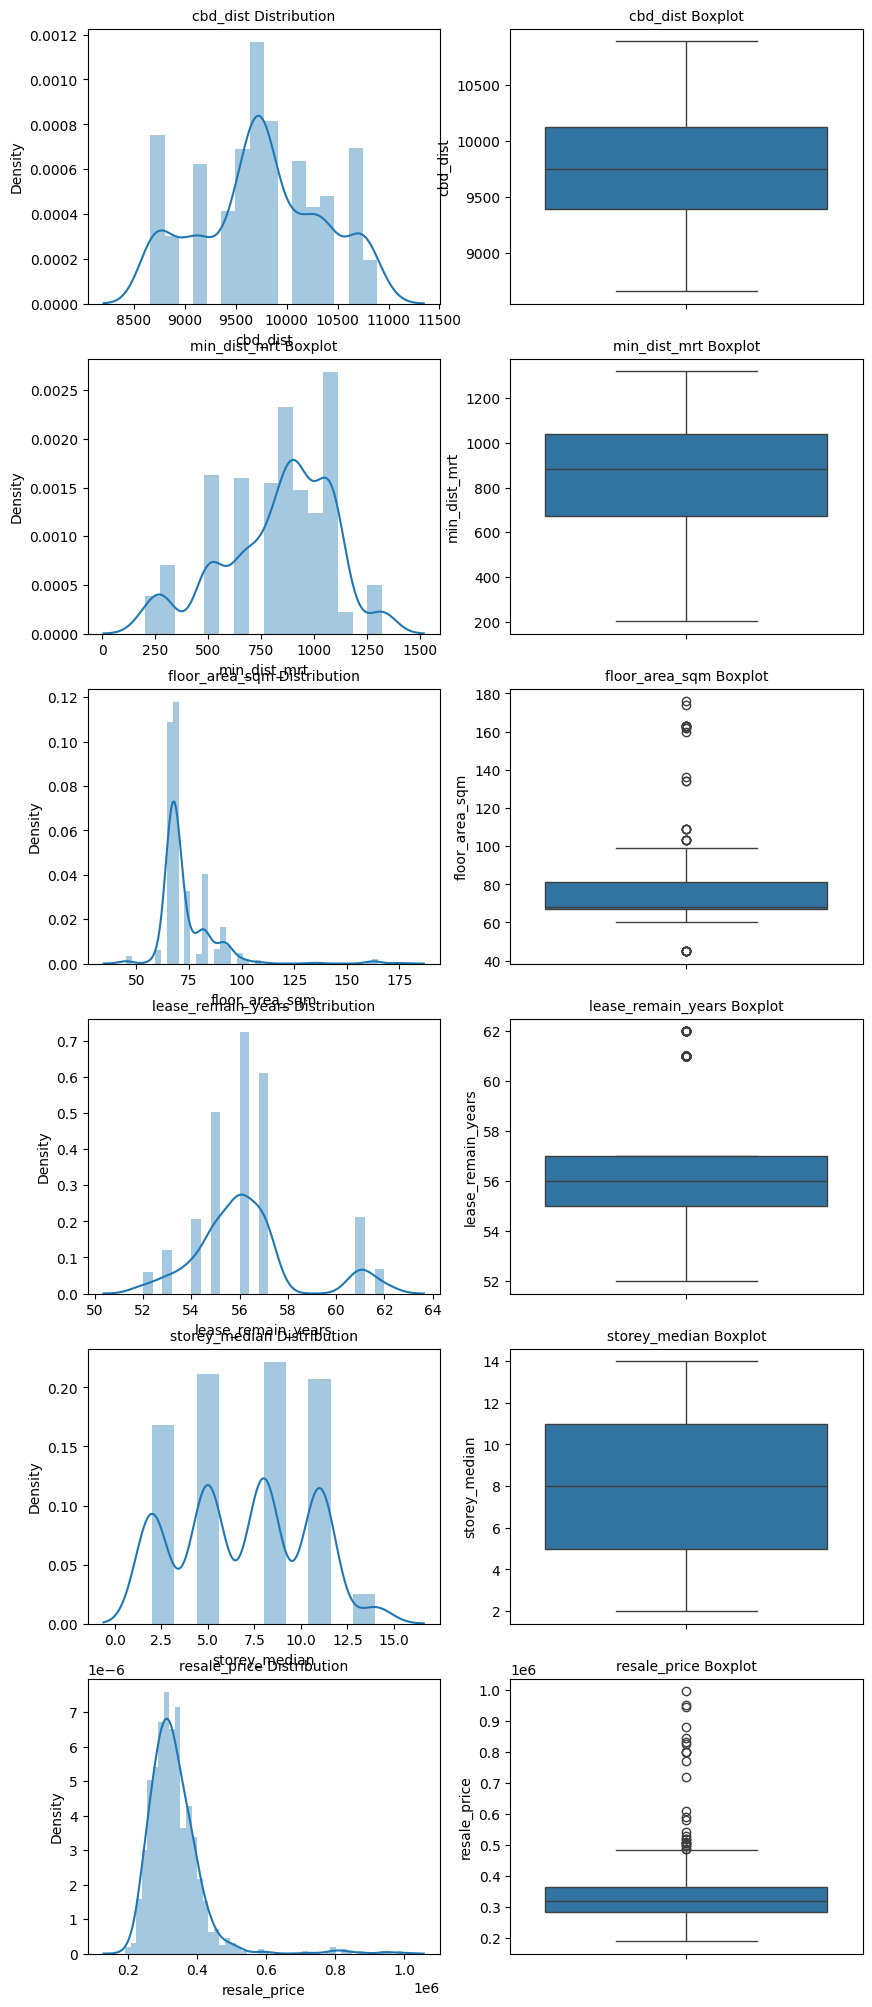

In [119]:
# checking the overfitting are underfitting in boxplot
fig,axes = plt.subplots(nrows =6,ncols =2)
fig.set_size_inches(10,25)
a = sns.distplot(scope_df['cbd_dist'],ax=axes[0][0])
a.set_title("cbd_dist Distribution",fontsize = 10)
a = sns.boxplot(scope_df['cbd_dist'],orient = 'v',ax = axes[0][1])
a.set_title("cbd_dist Boxplot",fontsize=10)

a = sns.distplot(scope_df['min_dist_mrt'],ax = axes[1][0])
a.set_title("min_dist_mrt Boxplot",fontsize=10)
a = sns.boxplot(scope_df['min_dist_mrt'],orient = 'v',ax=axes[1][1])
a.set_title("min_dist_mrt Boxplot",fontsize =10)

a = sns.distplot(scope_df['floor_area_sqm'],ax=axes[2][0])
a.set_title("floor_area_sqm Distribution",fontsize=10)
a = sns.boxplot(scope_df['floor_area_sqm'],orient ='v',ax= axes[2][1])
a.set_title("floor_area_sqm Boxplot",fontsize=10)

a = sns.distplot(scope_df['lease_remain_years'] , ax=axes[3][0])
a.set_title("lease_remain_years Distribution",fontsize=10)
a = sns.boxplot(scope_df['lease_remain_years'] , orient = "v" , ax=axes[3][1])
a.set_title("lease_remain_years Boxplot",fontsize=10)

a = sns.distplot(scope_df['storey_median'] , ax=axes[4][0])
a.set_title("storey_median Distribution",fontsize=10)
a = sns.boxplot(scope_df['storey_median'] , orient = "v" , ax=axes[4][1])
a.set_title("storey_median Boxplot",fontsize=10)

a = sns.distplot(scope_df['resale_price'] , ax=axes[5][0])
a.set_title("resale_price Distribution",fontsize=10)
a = sns.boxplot(scope_df['resale_price'] , orient = "v" , ax=axes[5][1])
a.set_title("resale_price Boxplot",fontsize=10)

plt.show()

In [120]:
flat_df_1 = scope_df

# Treating outliers 

In [121]:
def rem_outlier(col):
    sorted(col)
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lower_rag = q1-(1.5*iqr)
    upper_rag = q3+(1.5*iqr)
    return lower_rag,upper_rag

In [122]:
outerlier = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

In [123]:
for i in outerlier:
    lr,ur = rem_outlier(flat_df_1[i])
    flat_df_1[i] = np.where(flat_df_1[i]>ur,ur,flat_df_1[i])
    flat_df_1[i] = np.where(flat_df_1[i]<lr,lr,flat_df_1[i])

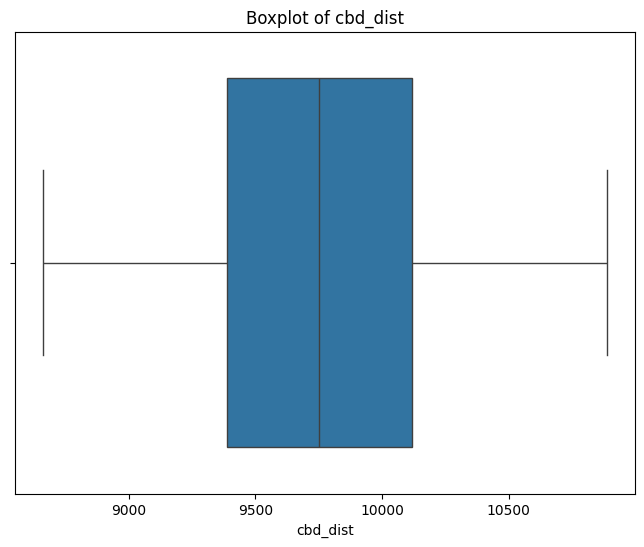

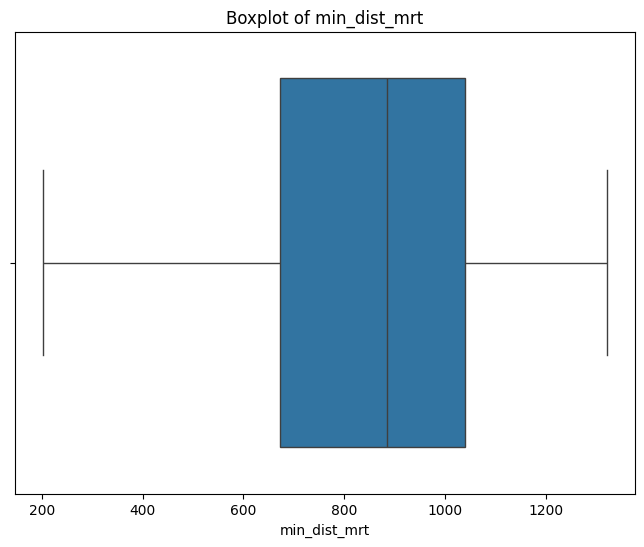

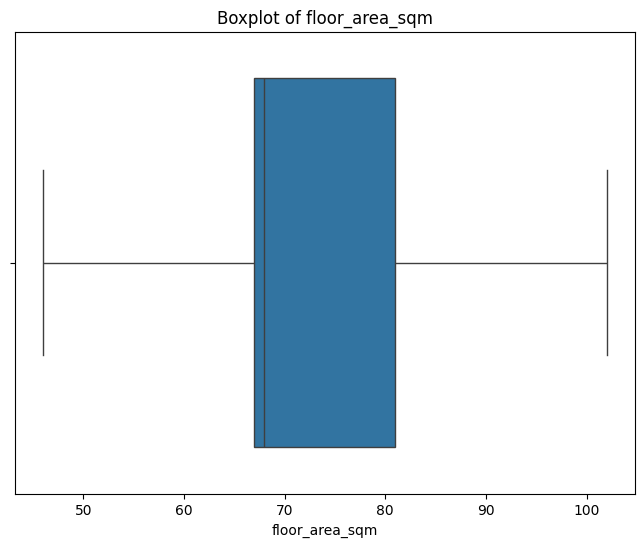

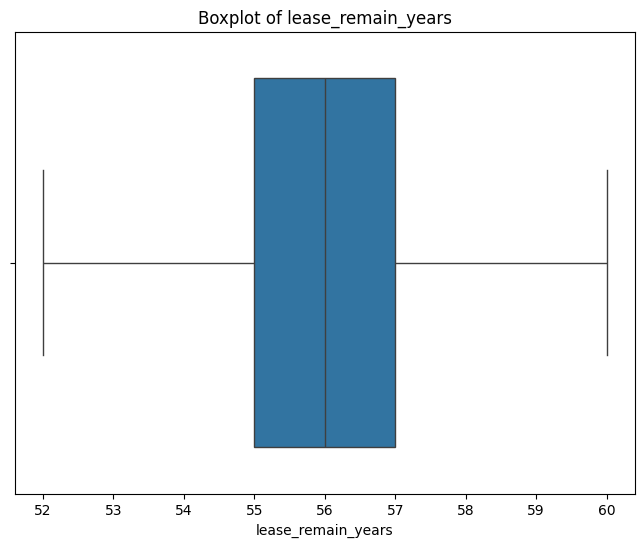

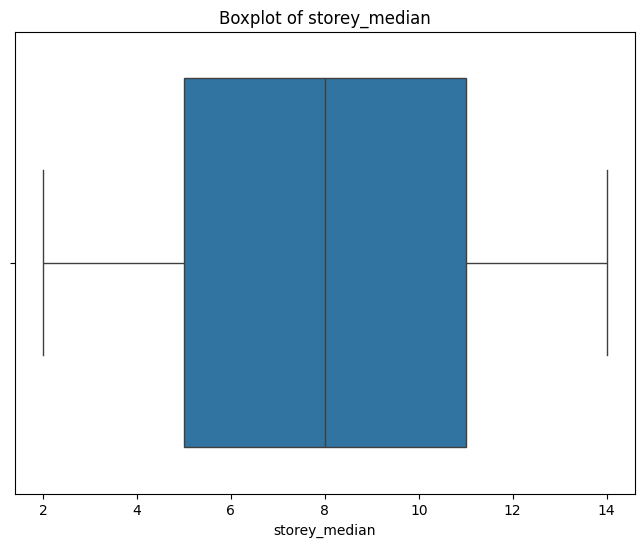

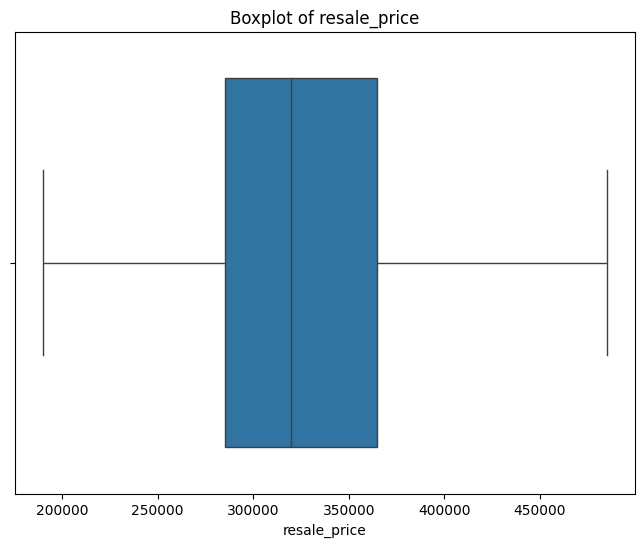

In [124]:
box = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']
for i in box:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=flat_df_1,x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

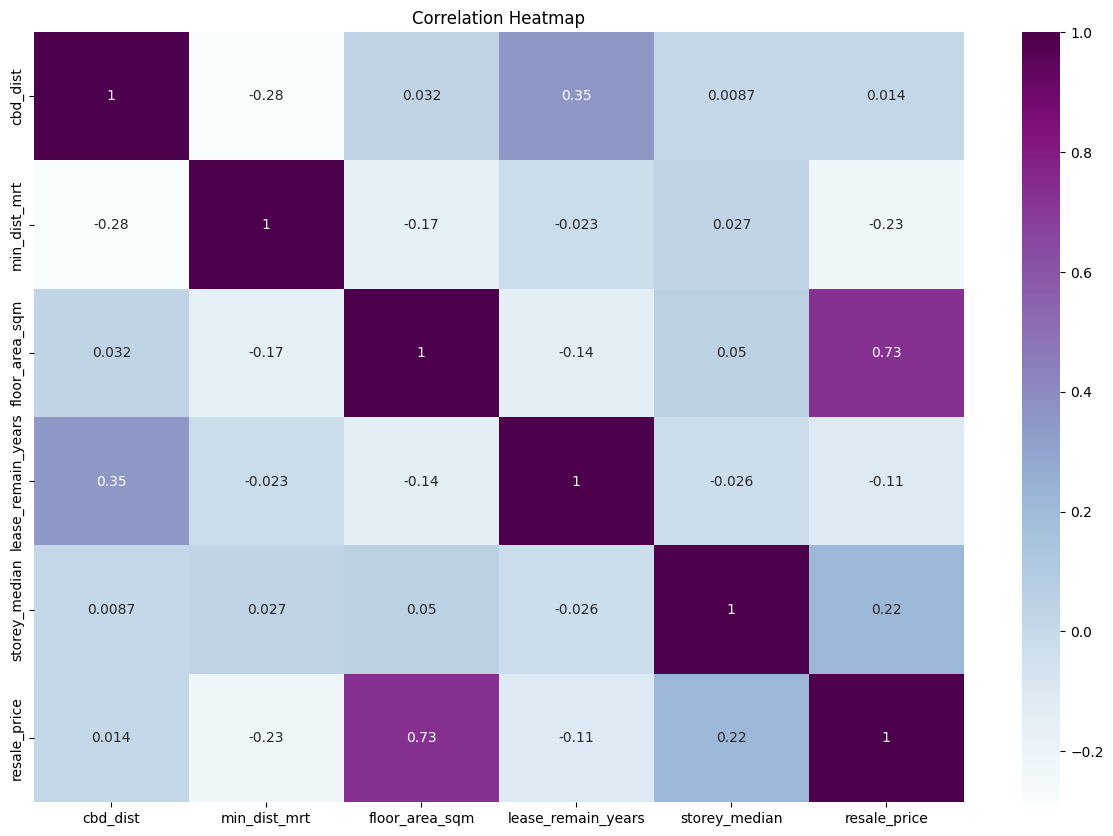

In [169]:
corrMatrix = flat_df_1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='BuPu', 
    annot=True
)

# Bulid the Model

In [126]:
from sklearn.preprocessing import StandardScaler

In [170]:
X = flat_df_1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']] # actual value
y = flat_df_1[['resale_price']] # traget value

In [171]:
y.value_counts()

resale_price
300000.0        29
290000.0        29
485000.0        27
280000.0        25
305000.0        23
                ..
322800.0         1
324000.0         1
324888.0         1
325880.0         1
327000.0         1
Name: count, Length: 220, dtype: int64

In [172]:
# To normalizing  the encoded data
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [173]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,0.897497,1.032213,-1.309896,2.138586,0.304852
1,0.897497,1.032213,-1.309896,2.138586,1.179841
2,0.897497,1.032213,-0.398723,2.138586,-0.570137
3,0.897497,1.032213,-2.727277,2.138586,0.304852
4,0.897497,1.032213,-1.208655,2.138586,-0.570137
...,...,...,...,...,...
968,-0.471927,-2.434843,0.006243,-0.590748,-1.445125
969,-0.471927,-2.434843,0.006243,-0.590748,0.304852
970,-0.471927,-2.434843,0.006243,-0.590748,-1.445125
971,-0.471927,-2.434843,0.006243,-0.590748,-0.570137


In [174]:
# This are pre model spliting and  model score basices need this..
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
# This are model choosing part to import him..
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [175]:
# first train and test split him
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Building DecisionTreeRegressor Model

In [176]:
dtr = DecisionTreeRegressor()

In [177]:
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [178]:
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [179]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [180]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [181]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)
print("R-Squared: ",r2)

Mean Squared Error:  2162428350.737712
Mean Absolute Error:  35779.13525779718
Root Mean Squared Error:  46501.91771032364
R-Squared:  0.37358448739853856


In [182]:
grid_search.score(X_train,y_train)

0.4180015632546972

In [183]:
grid_search.score(X_test,y_test)

0.37358448739853856

# Building Linear Regression model

In [184]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [185]:
# Let check the intercept for the model
inter = regression_model.intercept_[0]
print("The intercept for our model is {}".format(inter))

The intercept for our model is 328953.08057620924


In [186]:
regression_model.score(X_train,y_train)

0.5651428297408017

In [187]:
regression_model.score(X_test,y_test)

0.6079529973103087

In [47]:
# X = flat_df_1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']] # actual value
# y = flat_df_1[['resale_price']]

In [188]:
mse_linear = np.mean((regression_model.predict(X_test)-y_test)**2)

In [189]:
import math
print("Root Mean Squared Error: %.3f" % math.sqrt(mse))

Root Mean Squared Error: 46501.918


In [190]:
y_pred = regression_model.predict(X_test)

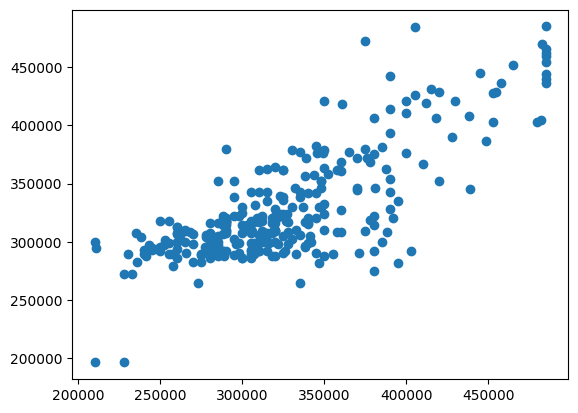

In [191]:
plt.scatter(y_test['resale_price'],y_pred)

In [192]:
from scipy.stats import zscore

X_train_scaled  = zscore(X_train)
X_test_scaled = zscore(X_test)
y_train_scaled = zscore(y_train)
y_test_scaled = zscore(y_test)

In [193]:
regression_model_linear = LinearRegression()
regression_model_linear.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [195]:
intercept = regression_model_linear.intercept_[0]
intercept

-4.820228821140124e-17

In [196]:
regression_model_linear.score(X_test_scaled,y_test_scaled)

0.6075083643552956

In [197]:
regression_model_linear.score(X_train_scaled,y_train_scaled)

0.5651428297408017

In [198]:
mse_linear = np.mean((regression_model_linear.predict(X_test_scaled)-y_test_scaled)**2)

In [199]:
math.sqrt(mse_linear)

0.6264915287892602

In [200]:
y_pred_linear = regression_model_linear.predict(X_test_scaled)

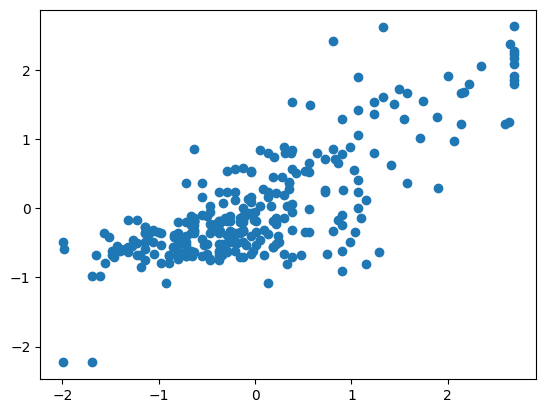

In [201]:
plt.scatter(y_test_scaled['resale_price'],y_pred_linear)

# Building Randomforest model 

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=64)
random_forest_Regressor = RandomForestRegressor(n_estimators=600,oob_score=True)
random_forest_Regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600, oob_score=True)

In [203]:
oob_score = random_forest_Regressor.oob_score_
print("OOB score : " ,oob_score)

oob_error = 1- random_forest_Regressor.oob_score_
print("OOB score : ",oob_error)

OOB score :  0.48807001405743444
OOB score :  0.5119299859425656


In [207]:
y_train_pric = random_forest_Regressor.predict(X_train)
y_test_pric = random_forest_Regressor.predict(X_test)

In [208]:
random_forest_Regressor.score(X_train,y_train)

0.7272214631434476

In [209]:
random_forest_Regressor.score(X_test,y_test)

0.48960212933886627

In [210]:
# Create an instance of each regression model
LR_model = LinearRegression()
DT_model = DecisionTreeRegressor()

# Train the models
LR_model.fit(X_train, y_train)
DT_model.fit(X_train, y_train)

# Make predictions on the test set
RFR_preds = random_forest_Regressor.predict(X_test)
LR_preds = LR_model.predict(X_test)
DT_preds = DT_model.predict(X_test)

# Evaluate the models

RFR_mse = mean_squared_error(y_test, RFR_preds)
RFR_mae = mean_absolute_error(y_test, RFR_preds)
RFR_r2 = r2_score(y_test, RFR_preds)

LR_mse = mean_squared_error(y_test, LR_preds)
LR_mae = mean_absolute_error(y_test, LR_preds)
LR_r2 = r2_score(y_test, LR_preds)

dt_mse = mean_squared_error(y_test, DT_preds)
dt_mae = mean_absolute_error(y_test, DT_preds)
dt_r2 = r2_score(y_test, DT_preds)

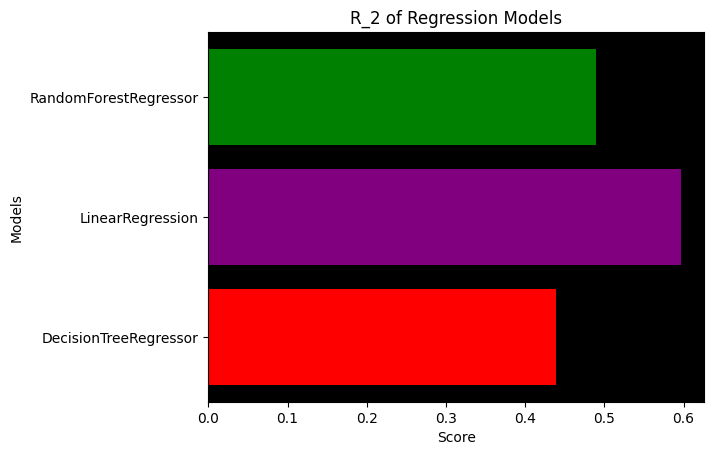

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

DecisionTreeRegressor 0.4388068201960411
LinearRegression 0.5964720493239177
RandomForestRegressor 0.48960212933886627


In [211]:
import matplotlib.pyplot as plt

models = ['DecisionTreeRegressor', 'LinearRegression', 'RandomForestRegressor']
score = [dt_r2, LR_r2, RFR_r2]

# Specify three different colors
colors = ['red', 'purple', 'green']

fig, ax = plt.subplots()

ax.barh(models, score, color=colors)
ax.set_xlabel('Score')
ax.set_ylabel('Models')
ax.set_title('R_2 of Regression Models')

# Set the background color to black
ax.set_facecolor('black')

plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model


In [212]:
print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")


Model: LinearRegression contain Maximum R2_Score: 0.5964720493239177 


In [214]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = Scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

inf